In [33]:
import pandas as pd
import numpy as np
df=pd.read_csv("google_places_full.csv")

print(df.shape)
df.info()
df.isna().sum()

(12782, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Айди локации        12782 non-null  object 
 1   Название            12782 non-null  object 
 2   Адрес               12782 non-null  object 
 3   Рейтинг заведения   12779 non-null  float64
 4   Количество оценок   12779 non-null  float64
 5   Ценовая категория   7852 non-null   float64
 6   Статус              12781 non-null  object 
 7   Широта              12782 non-null  float64
 8   Долгота             12782 non-null  float64
 9   Город (запрос)      12782 non-null  object 
 10  Категория (запрос)  12782 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.1+ MB


,0
Айди локации,0
Название,0
Адрес,0
Рейтинг заведения,3
Количество оценок,3
Ценовая категория,4930
Статус,1
Широта,0
Долгота,0
Город (запрос),0


In [34]:
df=df.rename(columns={"Город (запрос)":"Город","Категория (запрос)": "Категория"})


Можем заметить, что больше всего пропусков в колонке «Ценовая категория».

In [35]:
mis=(df.groupby('Город')['Ценовая категория']
    .apply(lambda x: x.isna().mean()*100)
    .reset_index(name='Процент пропусков')
    .sort_values('Процент пропусков', ascending=False))

mis

,Город,Процент пропусков
45,"Tirana, Albania",81.600000
16,"Kotor, Montenegro",74.375000
29,"Nicosia, Cyprus",62.809917
47,"Valletta, Malta",55.214724
21,"Luxembourg City, Luxembourg",54.871795
25,"Marseille, France",53.386454
40,"Skopje, North Macedonia",53.086420
11,"Dubrovnik, Croatia",51.569507
34,"Reykjavik, Iceland",51.231527
28,"Nice, France",50.806452


Так как датасет изначально на 13000 строк, то мы можем удалить строки с пропусками у стран у которых до 50%

Остальные полностью удали.

In [36]:
cities_to_drop = [
    'Tirana, Albania',
    'Kotor, Montenegro',
    'Nicosia, Cyprus',
    'Valletta, Malta',
    'Luxembourg City, Luxembourg',
    'Marseille, France',
    'Skopje, North Macedonia',
    'Dubrovnik, Croatia',
    'Reykjavik, Iceland'
]

df = df[~df['Город'].isin(cities_to_drop)].reset_index(drop=True)

print('После удаления:', df.shape)

После удаления: (10852, 11)


In [37]:
df=df.dropna(subset=['Ценовая категория']).reset_index(drop=True)

In [38]:
print(df.shape)
df.info()
df.isna().sum()

(7076, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7076 entries, 0 to 7075
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Айди локации       7076 non-null   object 
 1   Название           7076 non-null   object 
 2   Адрес              7076 non-null   object 
 3   Рейтинг заведения  7076 non-null   float64
 4   Количество оценок  7076 non-null   float64
 5   Ценовая категория  7076 non-null   float64
 6   Статус             7076 non-null   object 
 7   Широта             7076 non-null   float64
 8   Долгота            7076 non-null   float64
 9   Город              7076 non-null   object 
 10  Категория          7076 non-null   object 
dtypes: float64(5), object(6)
memory usage: 608.2+ KB


,0
Айди локации,0
Название,0
Адрес,0
Рейтинг заведения,0
Количество оценок,0
Ценовая категория,0
Статус,0
Широта,0
Долгота,0
Город,0


Теперь поработаем со статусами:

OPERATIONAL - работает

CLOSED_TEMPORARILY - временно закрыто

CLOSED_PERMANENTLY - закрыто навсегда

Так как для нашей бизнес задачи нужны только открытые заведения, то удалим все закрывшиеся

In [39]:
df=df[df["Статус"]=="OPERATIONAL"]



---



Мерджим со звездами

In [40]:
stars_df = pd.read_excel("finalochka_stars.xlsx")
stars_df.rename(columns={'restaurant_name': 'Название'}, inplace=True)

In [41]:
need_cols = ['Название', 'city', 'stars']
stars_slim=stars_df[need_cols].drop_duplicates(subset=['Название'])

df=df.merge(stars_slim, on='Название', how='left')

In [42]:
df['stars'].count()
df['stars'] = df['stars'].fillna(0)

In [43]:
len(df)

7070

Работаем с рейтингами

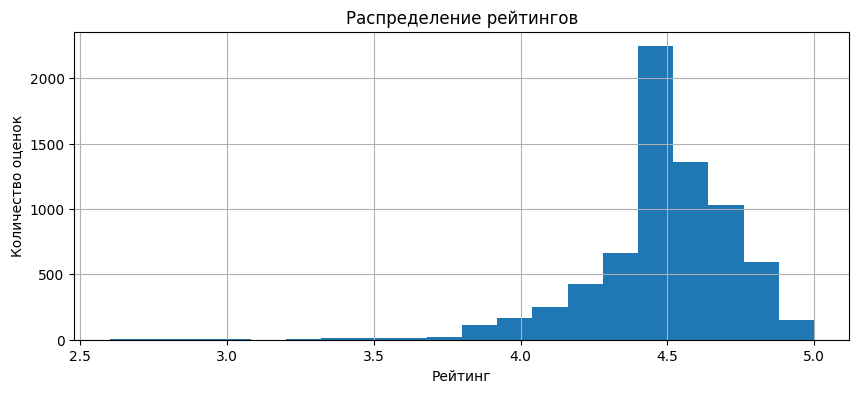

count    7070.000000
mean        4.484342
std         0.242230
min         2.600000
25%         4.400000
50%         4.500000
75%         4.700000
max         5.000000
Name: Рейтинг заведения, dtype: float64


In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(df['Рейтинг заведения'],bins=20)
plt.title("Распределение рейтингов")
plt.xlabel("Рейтинг")
plt.ylabel("Количество оценок")
plt.grid()
plt.show()

print(df["Рейтинг заведения"].describe())

Можно увидеть, что 25% датасета составляют заведения с рейтингом ниже 4,4

Можем их убрать, тк нет смысла с ними работать

In [45]:
df['Рейтинг заведения']=pd.to_numeric(df['Рейтинг заведения'], errors="coerce")
df=df[df["Рейтинг заведения"]>=4.4]
len(df)

5377

После чистки 5377 строк



---



Смотрим связь рейтинга с числом отзывов

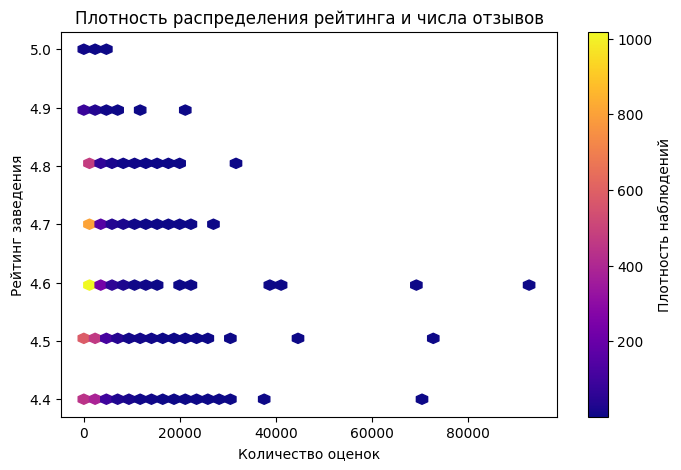

In [46]:
plt.figure(figsize=(8,5))

plt.hexbin(df["Количество оценок"],df["Рейтинг заведения"],gridsize=40,cmap="plasma",mincnt=1)
plt.colorbar(label="Плотность наблюдений")

plt.xlabel("Количество оценок")
plt.ylabel("Рейтинг заведения")

plt.title("Плотность распределения рейтинга и числа отзывов")
plt.show()

Большинство заведений имеют хороший рейтинг (4.4-4,5), но немного отзывов. А оценку 4.6-4.8 вообще чаще всего ставят без комментариев.

Теперь посмотрим распределение заведений по категориям

Распределение заведений по категориям:
Категория
restaurants    1752
bars           1397
cafes          1239
bakeries        804
coffee          185
Name: count, dtype: int64


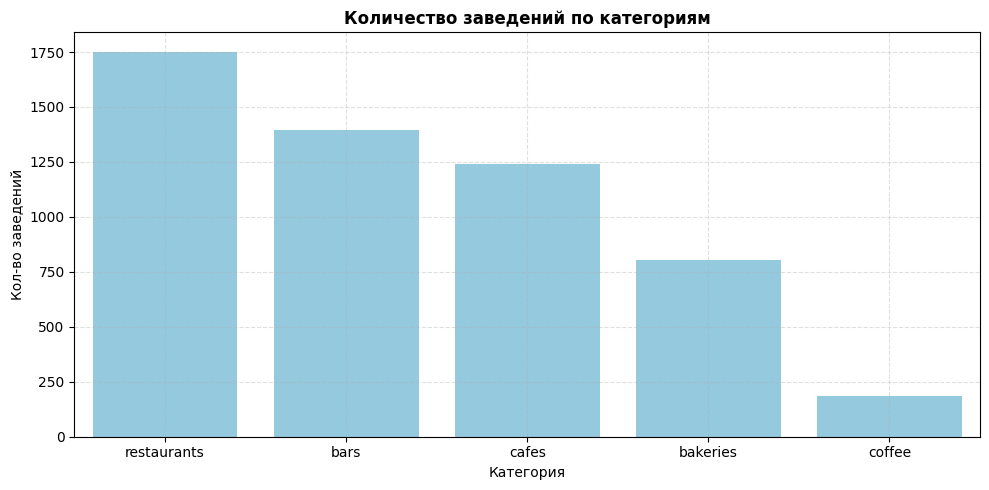

In [47]:
import seaborn as sns
c=df['Категория'].value_counts()

print("Распределение заведений по категориям:")
print(c)

plt.figure(figsize=(10, 5))
sns.barplot(x=c.index, y=c.values, color='skyblue', edgecolor='none')

plt.title('Количество заведений по категориям', fontweight='bold')
plt.ylabel('Кол-во заведений')


plt.grid(ls='--', alpha=0.4)
plt.tight_layout()
plt.show()

Больше всего представлено именно рестаранов и меньше всего кафе.Тогда посмотрим как вообще рассредоточены категории по ценовым сегментам. Это понадобиться для дальнейшей сегментации. Чтобы каждый из классов мог содержать необходимые тип заведений для завтрака, обеда и ужина.



---

# **Новые данные**
Отнормированные цены позволят проводить более точный анализ

In [48]:
df["Страна"]=df["Адрес"].apply(lambda x: x.split(",")[-1].strip())
df['Город'] = df['Город'].str.split(',').str[0].str.strip()

In [49]:
numbeo=pd.read_excel("numbeo_restaurant_index.xlsx")
numbeo.columns = ["Страна", "Restaurant Price Index", "Коэффициент", "Категория цены"]
df=df.merge(numbeo[["Страна", "Restaurant Price Index", "Коэффициент"]], on="Страна", how="left")
numbeo.head()

,Страна,Restaurant Price Index,Коэффициент,Категория цены
0,Switzerland,145.2,1.452,Очень дорого
1,Norway,131.8,1.318,Очень дорого
2,Denmark,109.7,1.097,Дорого
3,Luxembourg,108.5,1.085,Дорого
4,Netherlands,102.4,1.024,Выше среднего


In [50]:
df["Нормирование"]=df["Ценовая категория"]*df["Коэффициент"]

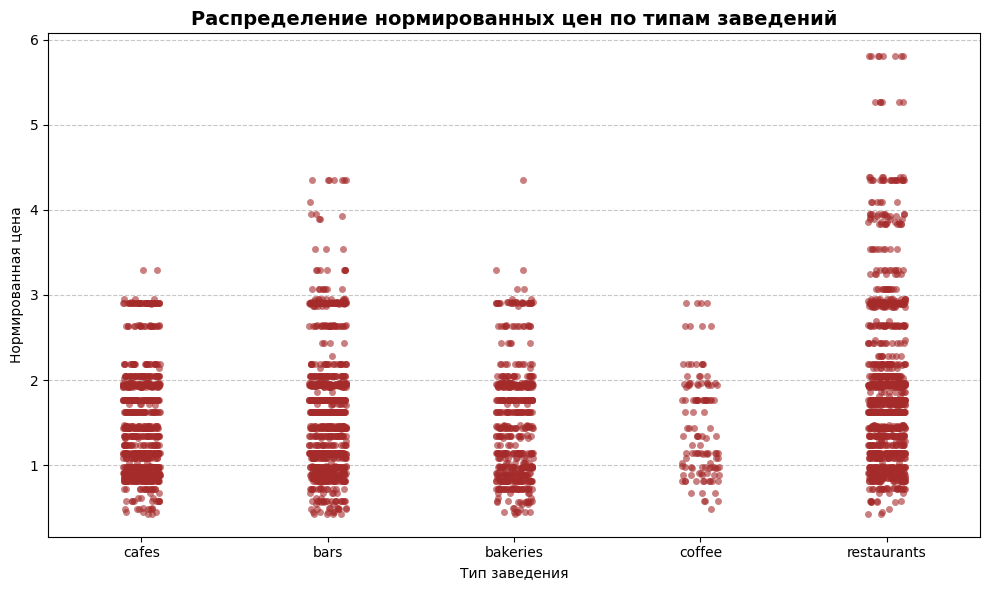

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.stripplot(data=df, x="Категория",y="Нормирование",alpha=0.6, color='brown')

plt.title("Распределение нормированных цен по типам заведений", fontweight='bold', fontsize=14)
plt.xlabel("Тип заведения")
plt.ylabel("Нормированная цена")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Кофейни на самом деле достаточно равномерно распределены.
Но мы вынесем их в отдельный список, тк как они не будут влиять на туры и будут идти по желанию покупателей


---



Посмотрим в какой ценовой категориии больше всего заведений.

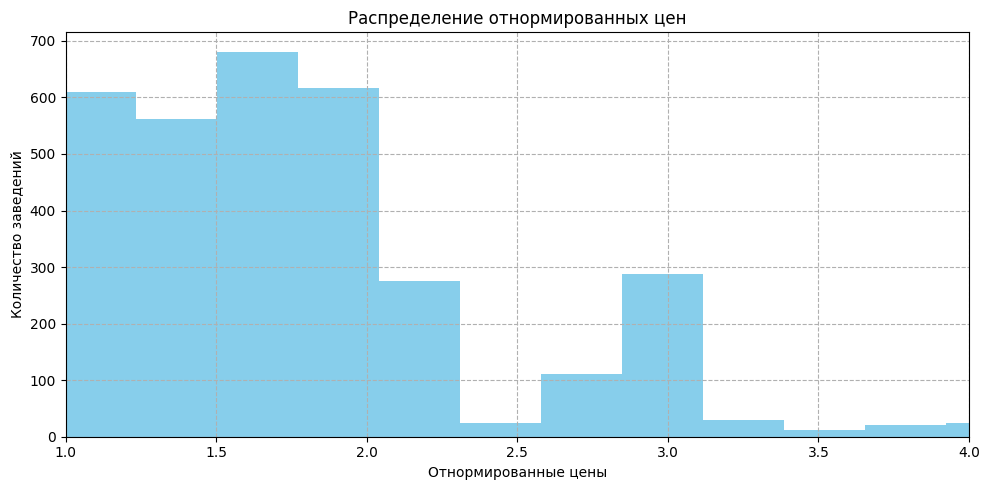

In [52]:
plt.figure(figsize=(10,5))
plt.hist(df['Нормирование'], bins=20, color='skyblue')
plt.title('Распределение отнормированных цен')
plt.xlabel('Отнормированные цены')
plt.ylabel('Количество заведений')
plt.grid(ls='--')
plt.xlim(1, 4)
plt.tight_layout()
plt.show()

In [53]:
import plotly.express as px

country_count = (
    df.groupby('Страна')['Название']
    .count()
    .reset_index()
    .rename(columns={'Название': 'Количество заведений'})
)

fig = px.choropleth(
    country_count,
    locations='Страна',
    locationmode='country names',
    color='Количество заведений',
    color_continuous_scale='Reds',
    title='Количество заведений по странам'
)
fig.update_layout(geo_scope="europe")
fig.show()

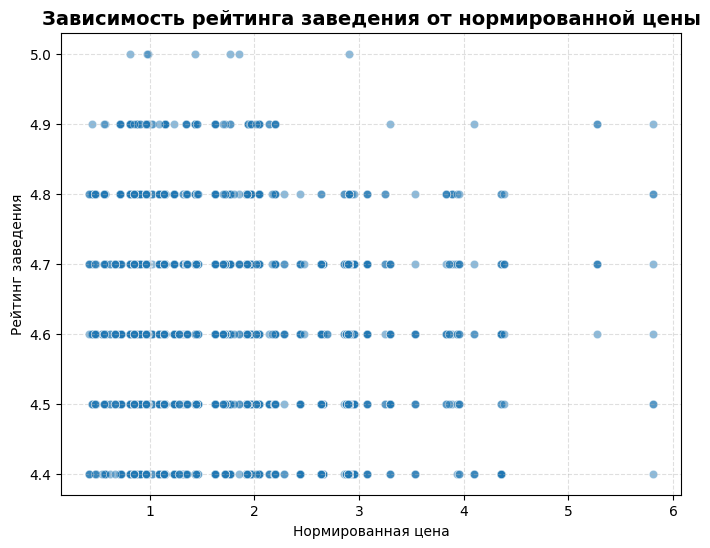

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Нормирование', y='Рейтинг заведения', alpha=0.5)

plt.title('Зависимость рейтинга заведения от нормированной цены', fontsize=14, fontweight='bold')
plt.xlabel('Нормированная цена')
plt.ylabel('Рейтинг заведения')
plt.grid(ls='--', alpha=0.4)
plt.show()

Благодаря этим данным, мы понимаем, что можно разбить на ценовые сегменты. Новые датасеты будут содержать все необходимые категории для завтрака/обеда/ужина, при этом будут с хорошим рейтингом


---



# Сегментирование

Теперь приступим к сегментированию. У нас их будет три: Экономный, Средний, Премиум



In [55]:
def segment(price):
    if price<1.4:
        return 'Экономный'
    elif 1.4<= price< 2.4:
        return 'Средний'
    elif 2.4<= price<= 6:
        return 'Премиум'

df['сегмент']=df['Нормирование'].apply(segment)

In [56]:
econom = df[df['сегмент'] == 'Экономный'].copy()
middle = df[df['сегмент'] == 'Средний'].copy()
premium = df[df['сегмент'] == 'Премиум'].copy()
print(f"Экономный сегмент: {len(econom)} заведений")
print(f"Средний сегмент: {len(middle)} заведений")
print(f"Премиум сегмент: {len(premium)} заведений")

Экономный сегмент: 1661 заведений
Средний сегмент: 1886 заведений
Премиум сегмент: 556 заведений


In [57]:
total_stars = premium['stars'].fillna(0).astype(float).sum()
print('Общее количество звёзд Michelin в премиум-сегменте:', int(total_stars))

Общее количество звёзд Michelin в премиум-сегменте: 48


In [58]:
df_stars = df[df["stars"].isin([1, 2, 3])].copy()

df_stars["stars"] = df_stars["stars"].astype(int)
grouped = (
    df_stars
    .groupby(["Страна", "stars"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Страна", "stars"], ascending=[True, True]))

print(grouped)

            Страна  stars  Count
0     1051 Hungary      1      1
1     1051 Hungary      3      2
2          Austria      1      1
3          Belgium      1      1
4          Croatia      1      1
5          Croatia      3      1
6          Denmark      3      2
7           France      1      5
8           France      3      1
9           Greece      3      1
10          Latvia      2      1
11       Lithuania      2      1
12     Netherlands      1      3
13          Norway      3      4
14          Poland      1      1
15          Poland      3      2
16        Portugal      1      2
17        Portugal      3      3
18         Romania      3      4
19          Serbia      1      1
20        Slovenia      3      1
21           Spain      1      3
22          Sweden      3      2
23  United Kingdom      3      3


Нашей фишкой будет то, что премиум сегмент содержит и рестораны со звездами мешлен

In [62]:
# 1. Считаем доли ресторанов каждого сегмента внутри страны
country_segments = (
    df.groupby(['Страна', 'сегмент'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

# 2. Добавляем столбец с доминирующим сегментом (где доля больше)
country_segments['доминирующий_сегмент'] = country_segments.idxmax(axis=1)

# 3. Если индекс состоит из кортежей, оставляем только первую часть (название страны)
if isinstance(country_segments.index[0], tuple):
    country_segments.index = [x[0] for x in country_segments.index]

# 4. Добавляем столбец "Категория страны" в основной DataFrame
df['Категория страны'] = df['Страна'].map(country_segments['доминирующий_сегмент'])

In [63]:
print(df["Категория"].unique()[:20])

['cafes' 'bars' 'bakeries' 'coffee' 'restaurants']


In [65]:
df["Категория страны"] = df["Категория страны"].astype(str).str.strip().str.capitalize()
df["Страна"] = df["Страна"].astype(str).str.strip()
df["Город"] = df["Город"].astype(str).str.strip()
df["Категория"] = df["Категория"].astype(str).str.strip().str.lower()

segment = input("Введите ценовую категорию страны (Экономный / Средний / Премиум): ").strip().capitalize()

valid_segments = ["Экономный", "Средний", "Премиум"]
if segment not in valid_segments:
    print("Ошибка: нужно ввести одно из трёх значений — Экономный, Средний или Премиум.")
    exit()

countries = df[df["Категория страны"] == segment]["Страна"].dropna().unique()

if len(countries) == 0:
    print("Нет стран с такой категорией")
    exit()

print("Доступные страны:")
for c in countries:
    print("-", c)

country = input("Введите предпочитаемую страну: ").strip()

if country not in countries:
    print("Ошибка: выберите страну из списка.")
    exit()


cities = df[df["Страна"] == country]["Город"].dropna().unique()

if len(cities) == 0:
    print("В этой стране нет доступных городов")
    exit()

print("Доступные города:")
for city in cities:
    print("-", city)

city_choice = input("Введите город: ").strip()

if city_choice not in cities:
    print("Ошибка: выберите город из списка")
    exit()

print("Рекомендации:")

if segment == "Премиум":
    breakfast = ["cafes", "bakeries", "coffee", "restaurants", "bars"]
    lunch = ["restaurants", "bars"]
    dinner = ["restaurants", "bars"]
elif segment == "Средний":
    breakfast = ["cafes", "bakeries", "coffee"]
    lunch = ["cafes", "restaurants", "bars"]
    dinner = ["restaurants", "bars"]
else:
    breakfast = ["bakeries", "coffee"]
    lunch = ["cafes"]
    dinner = ["restaurants"]

def show_places(meal, categories):
    subset = df[
        (df["Город"].str.lower() == city_choice.lower())
        & (df["Категория"].str.lower().isin(categories))
    ]
    names = subset["Название"].dropna().unique()
    print(f"\n{meal}:")
    if len(names) == 0:
        print("нет заведений")
    else:
        for n in sorted(names):
            print(n)

show_places("Завтрак", breakfast)
show_places("Обед", lunch)
show_places("Ужин", dinner)

KeyboardInterrupt: Interrupted by user